In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')

In [2]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m ,n = data.shape
np.random.shuffle(data)

data_train = data[1000:m].T
X_train = data_train[1:n]
y_train = data_train[0]
X_train = X_train / 255
_,m_train = X_train.shape

In [5]:
data_train = data[1000:m].T
X_train = data_train[1:n]
y_train = data_train[0]
X_train = X_train / 255
_,m_train = X_train.shape

So, until now we have sliced the data for our training process transpositions for were made in order to facilitate the dot products with the weight matrix

## Weights initialization

In [6]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    B1 = np.random.rand(10,1) - 0.5
    
    W2 = np.random.rand(342,10) - 0.5
    B2 = np.random.rand(342,1) - 0.5
    
    W3 = np.random.rand(10,342) - 0.5
    B3 = np.random.rand(10,1) - 0.5
    
    return W1,B1,W2,B2,W3,B3

## Activation Functions

In [7]:
def ReLU(Z):
    return np.maximum(Z,0)

In [8]:
def Softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

In [9]:
#one hot encoding

def one_hot(y):
    one_hot_Y = np.zeros((y.size , y.max()+1))
    one_hot_Y[np.arange(y.size), y] = 1
    one_hot_Y = one_hot_Y.T
    
    return one_hot_Y

In [10]:
# derivative of ReLU
def deriv_ReLU(Z):
    return Z > 0

## Forward Propagation

In [11]:
def forward_prop(W1,b1,W2,b2,W3,b3,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    
    Z3 = W3.dot(A2) + b3
    A3 = Softmax(Z3)
    
    return Z1,A1,Z2,A2,Z3,A3

## Backward Propagation

In [12]:
def back_prop(Z1,A1,Z2,A2,W2,Z3,A3,W3,X,Y):
    
    m = Y.size
    one_hot_Y = one_hot(Y)
    
    dZ3 = A3 - one_hot_Y
    
    dW3 = (1 / m) * dZ3.dot(A2.T)
    db3 = (1/m) * np.sum(dZ3)
    
    dZ2 = W3.T.dot(dZ3) * deriv_ReLU(Z2)
    
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1)
    
    return dW1, db1, dW2, db2, dW3, db3

## Update Parameters

In [13]:
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    B1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    B2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    B3 = b3 - alpha * db3
    
    return W1, B1, W2, B2, W3, B3

## Gradient Descent

In [14]:
def get_predictions(A):
    return np.argmax(A,0)

def get_accuracy(predictions,Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X,Y,iterations,alpha):
    W1,B1,W2,B2,W3,B3 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2,Z3,A3 = forward_prop(W1, B1, W2, B2, W3, B3, X)
        dW1, db1, dW2, db2, dW3, db3 = back_prop(Z1,A1,Z2,A2,W2,Z3,A3,W3,X,Y)
        W1, B1, W2, B2, W3, B3 = update_params(W1, B1, W2, B2, W3, B3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 50 == 0:
            print('Iteration: ',i)
            print('Accuracy: ',get_accuracy(get_predictions(A3),Y))
    return W1,B1,W2,B2,W3,B3

## Training

In [16]:
W1,B1,W2,B2,W3,B3 = gradient_descent(X_train,y_train,500,0.10)

Iteration:  0
[4 7 7 ... 7 5 5] [2 0 9 ... 5 8 5]
Accuracy:  0.10970731707317073
Iteration:  50
[6 0 7 ... 6 6 6] [2 0 9 ... 5 8 5]
Accuracy:  0.36460975609756097
Iteration:  100
[3 0 9 ... 3 3 5] [2 0 9 ... 5 8 5]
Accuracy:  0.48704878048780487
Iteration:  150
[2 0 9 ... 3 9 5] [2 0 9 ... 5 8 5]
Accuracy:  0.6373414634146342
Iteration:  200
[2 0 9 ... 3 9 3] [2 0 9 ... 5 8 5]
Accuracy:  0.7070243902439024
Iteration:  250
[2 0 9 ... 5 9 3] [2 0 9 ... 5 8 5]
Accuracy:  0.7574390243902439
Iteration:  300
[2 0 9 ... 5 9 5] [2 0 9 ... 5 8 5]
Accuracy:  0.7902682926829269
Iteration:  350
[2 0 9 ... 5 9 5] [2 0 9 ... 5 8 5]
Accuracy:  0.811829268292683
Iteration:  400
[2 0 9 ... 8 8 8] [2 0 9 ... 5 8 5]
Accuracy:  0.825170731707317
Iteration:  450
[2 0 9 ... 5 8 8] [2 0 9 ... 5 8 5]
Accuracy:  0.8456829268292683


In [17]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


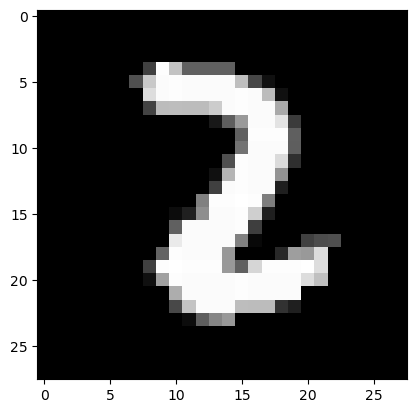

In [18]:
test_prediction(0, W1, B1, W2, B2, W3, B3)